In [1]:
# Importing Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [2]:
# Checking version of Tensorflow ans Keras
print(f"Tensorflow Version {tf.__version__}")
# print(f"Keras Version {tf.keras.__version__}")

Tensorflow Version 2.17.0


In [3]:
# # Changing directory to my drive
# ROOT = "/content/drive/MyDrive/DL-CV-NLP/Revision "
# os.chdir(ROOT)

In [4]:
os.getcwd()

'E:\\My GitHub Repos\\playground\\ANN_Simulate'

In [5]:
tf.config.list_physical_devices("GPU")

[]

In [6]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [7]:
check_list = ['GPU','CPU']

for device in check_list:
  out = tf.config.list_physical_devices(device)
  if len(out) > 0:
    print(f"{device} is available!")
    print(f"Details >> {out}")
  else:
    print(f"{device} isn't available!")

GPU isn't available!
CPU is available!
Details >> [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [8]:
mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [9]:
print(f"data type of X_train_full: {X_train_full.dtype},\n shape of X_train_full: {X_train_full.shape}")

data type of X_train_full: uint8,
 shape of X_train_full: (60000, 28, 28)


In [10]:
X_test.shape

(10000, 28, 28)

In [11]:
len(X_test[1][0])

28

In [12]:
# create a validation data set from the full training data 
# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# scale the test set as well
X_test = X_test / 255.

In [13]:
len(X_train_full[5000:] )

55000

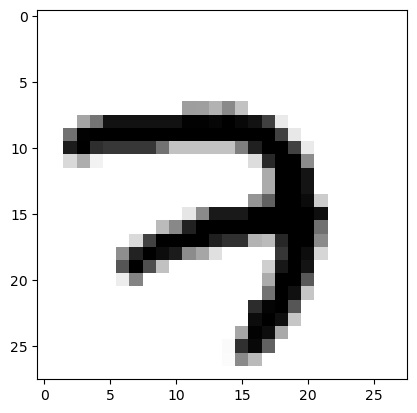

In [14]:
# Lets view some data 
plt.imshow(X_train[0], cmap="binary")
plt.show()

<Axes: >

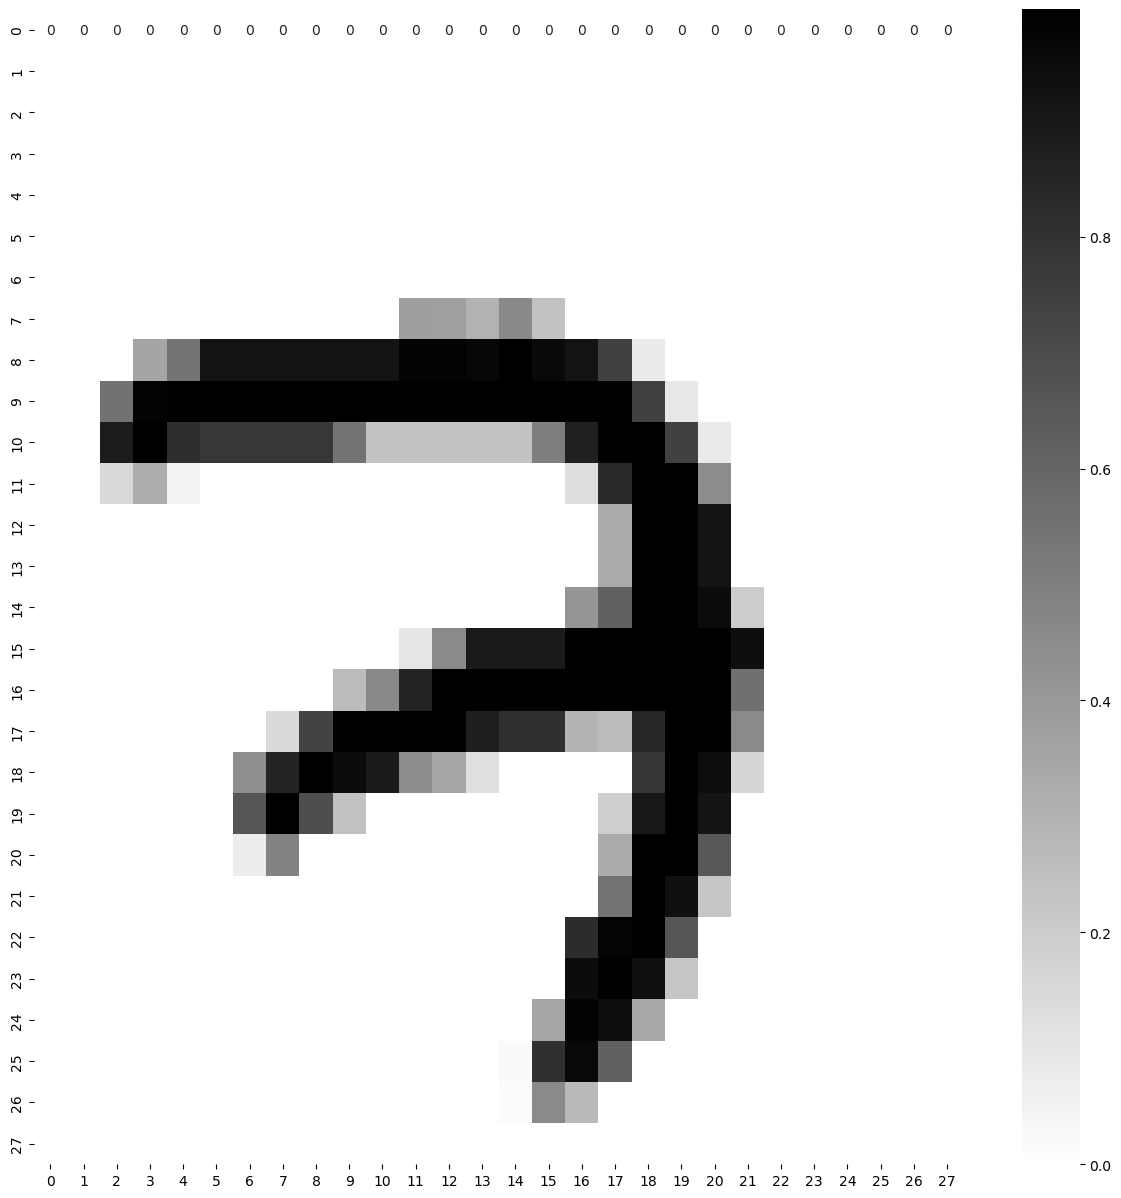

In [15]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot=True, cmap="binary")

In [16]:
# Creating layers of ANN
LAYERS = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

model_clf = tf.keras.models.Sequential(LAYERS);

C:\Users\Tuf\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
model_clf.layers

[<Flatten name=inputLayer, built=True>,
 <Dense name=hiddenLayer1, built=True>,
 <Dense name=hiddenLayer2, built=True>,
 <Dense name=outputLayer, built=True>]

In [18]:
model_clf.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inputLayer (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hiddenLayer1 (Dense)                 │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hiddenLayer2 (Dense)                 │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ outputLayer (Dense)                  │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# firsLayer * secondLayer + bias
784*300 + 300, 300*100+100, 100*10+10

(235500, 30100, 1010)

In [20]:
# Total parameters to be trained 
sum((235500, 30100, 1010))

266610

In [21]:
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [22]:
len(hidden1.get_weights()[1])

300

In [23]:
hidden1.get_weights()

[array([[-0.00927159,  0.04369053,  0.04989339, ...,  0.04857426,
          0.00334823, -0.06742593],
        [ 0.0701675 ,  0.0239264 , -0.00625524, ..., -0.02233909,
         -0.06237992, -0.01218208],
        [ 0.01261348, -0.05558022,  0.05907993, ..., -0.04917911,
         -0.01784244,  0.00548287],
        ...,
        [-0.01101524, -0.07238708, -0.05481914, ..., -0.05321736,
          0.00205853, -0.05917398],
        [-0.04220894,  0.05925411, -0.07112993, ...,  0.01721898,
          0.05296606,  0.04500993],
        [-0.01980612, -0.04133761,  0.00930867, ...,  0.00101159,
          0.07076301, -0.03912057]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [24]:
weights, biases = hidden1.get_weights()

In [25]:
print("shape\n",weights.shape, "\n")
weights

shape
 (784, 300) 



array([[-0.00927159,  0.04369053,  0.04989339, ...,  0.04857426,
         0.00334823, -0.06742593],
       [ 0.0701675 ,  0.0239264 , -0.00625524, ..., -0.02233909,
        -0.06237992, -0.01218208],
       [ 0.01261348, -0.05558022,  0.05907993, ..., -0.04917911,
        -0.01784244,  0.00548287],
       ...,
       [-0.01101524, -0.07238708, -0.05481914, ..., -0.05321736,
         0.00205853, -0.05917398],
       [-0.04220894,  0.05925411, -0.07112993, ...,  0.01721898,
         0.05296606,  0.04500993],
       [-0.01980612, -0.04133761,  0.00930867, ...,  0.00101159,
         0.07076301, -0.03912057]], dtype=float32)

In [26]:
print("shape\n", biases.shape)

shape
 (300,)


In [27]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
            optimizer=OPTIMIZER,
            metrics=METRICS)

In [28]:
# training
EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)
history = model_clf.fit(X_train, y_train, epochs=EPOCHS,
            validation_data=VALIDATION_SET, batch_size=32)

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7273 - loss: 1.0209 - val_accuracy: 0.9134 - val_loss: 0.3126
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9116 - loss: 0.3115 - val_accuracy: 0.9312 - val_loss: 0.2417
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9290 - loss: 0.2504 - val_accuracy: 0.9386 - val_loss: 0.2118
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9393 - loss: 0.2140 - val_accuracy: 0.9502 - val_loss: 0.1793
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9481 - loss: 0.1816 - val_accuracy: 0.9552 - val_loss: 0.1630
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9553 - loss: 0.1604 - val_accuracy: 0.9606 - val_loss: 0.1501
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9594 - loss: 0.1444 - val_accuracy: 0.9622 - val_loss: 0.1399
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9628 - loss: 0.1317 - 

In [29]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [30]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.841491,0.606954,0.9134,0.312604
1,0.916073,0.295525,0.9312,0.241699
2,0.930782,0.242813,0.9386,0.211766
3,0.940945,0.207698,0.9502,0.179316
4,0.948727,0.180869,0.9552,0.162964
5,0.954364,0.160366,0.9606,0.150144
6,0.959527,0.143207,0.9622,0.139880
7,0.963473,0.129740,0.9674,0.124341
8,0.966745,0.117811,0.9692,0.117545
9,0.970200,0.107343,0.9704,0.112641


<Axes: >

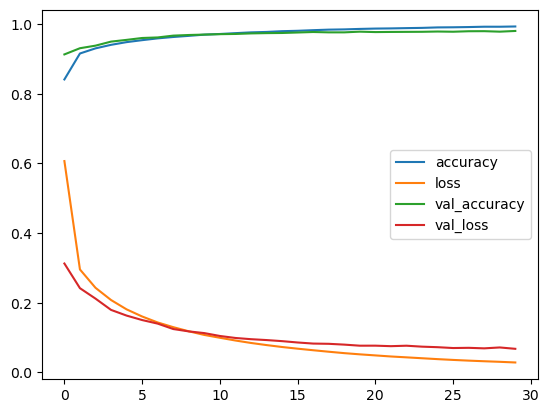

In [31]:
pd.DataFrame(history.history).plot()

In [32]:
model_clf.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9742 - loss: 0.0823


[0.0675637274980545, 0.9786999821662903]

In [33]:
x_new = X_test[:3]
# x_new

In [34]:
actual = y_test[:3]
actual

array([7, 2, 1], dtype=uint8)

In [35]:
y_prob = model_clf.predict(x_new)
y_prob.round(3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.997, 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.001,
        0.   ]], dtype=float32)

In [36]:
y_prob

array([[8.8104065e-07, 7.9550159e-07, 4.1287130e-05, 2.6015026e-04,
        5.7363138e-08, 5.3087786e-07, 5.2508609e-12, 9.9968767e-01,
        1.9332545e-06, 6.7160631e-06],
       [8.6421443e-07, 3.3407014e-05, 9.9991131e-01, 2.8569959e-05,
        8.2235252e-12, 9.9264753e-07, 4.2931697e-06, 3.1305625e-13,
        2.0590873e-05, 9.3776251e-14],
       [2.3089383e-06, 9.9702698e-01, 4.3141466e-04, 5.9610757e-05,
        1.9915155e-04, 2.4620880e-05, 1.7228836e-04, 6.0641166e-04,
        1.4679987e-03, 9.1259262e-06]], dtype=float32)

In [37]:
y_pred = np.argmax(y_prob, axis = -1)

In [38]:
y_pred

array([7, 2, 1], dtype=int64)

In [39]:
actual

array([7, 2, 1], dtype=uint8)

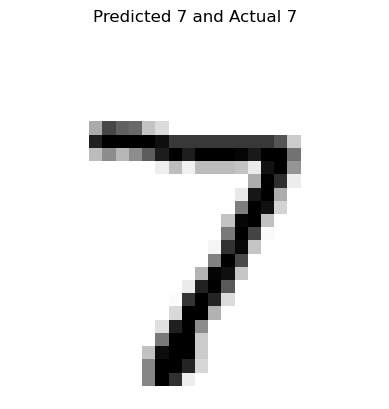

######################


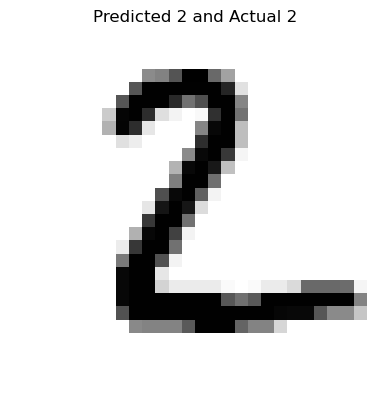

######################


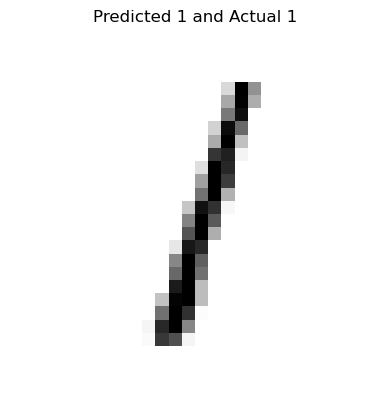

######################


In [40]:
# plot
for data, pred, actual_data in zip(x_new, y_pred, actual):
    plt.imshow(data, cmap="binary")
    plt.title(f"Predicted {pred} and Actual {actual_data}")
    plt.axis("off")
    plt.show() 
    print("######################")